Accuracy (LDA): 0.9814814814814815
Precision (LDA): 0.9824561403508772
Recall (LDA): 0.9814814814814815
Confusion Matrix (LDA):
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]

Accuracy (Logistic Regression): 0.9814814814814815
Precision (Logistic Regression): 0.9824561403508772
Recall (Logistic Regression): 0.9814814814814815
Confusion Matrix (Logistic Regression):
[[18  0  0]
 [ 1 20  0]
 [ 0  0 15]]


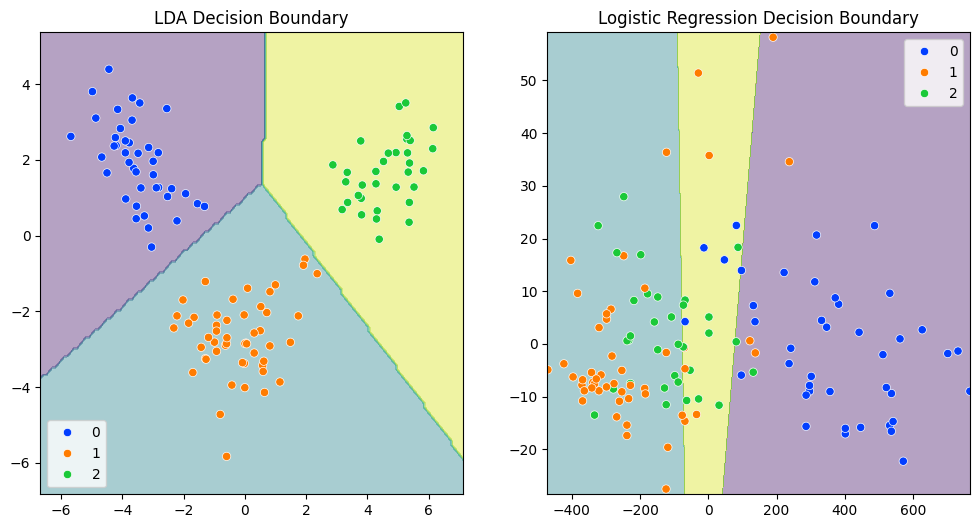

In [1]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the Wine dataset
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the dataset before applying Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train an LDA model
lda_classifier = LDA()
lda_classifier.fit(X_train, y_train)

# Predict using LDA on the test set
y_pred_lda = lda_classifier.predict(X_test)

# Evaluate the LDA model
accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda, average='weighted')
recall_lda = recall_score(y_test, y_pred_lda, average='weighted')
conf_matrix_lda = confusion_matrix(y_test, y_pred_lda)

# Output LDA results
print(f"Accuracy (LDA): {accuracy_lda}")
print(f"Precision (LDA): {precision_lda}")
print(f"Recall (LDA): {recall_lda}")
print("Confusion Matrix (LDA):")
print(conf_matrix_lda)

# Train a Logistic Regression model with more iterations and scaled data
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_scaled, y_train)

# Predict using Logistic Regression on the test set
y_pred_logreg = logreg_classifier.predict(X_test_scaled)

# Evaluate the Logistic Regression model
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

# Output Logistic Regression results
print(f"\nAccuracy (Logistic Regression): {accuracy_logreg}")
print(f"Precision (Logistic Regression): {precision_logreg}")
print(f"Recall (Logistic Regression): {recall_logreg}")
print("Confusion Matrix (Logistic Regression):")
print(conf_matrix_logreg)

# Optional: Visualize Decision Boundaries by reducing the dataset to 2D using LDA
# Reduce to 2 components for visualization
lda_2d = LDA(n_components=2)
X_lda_2d = lda_2d.fit_transform(X_train, y_train)

# Function to plot decision boundaries
def plot_decision_boundary(X, y, model, ax, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='bright', ax=ax)
    ax.set_title(title)

# Plotting LDA decision boundary
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# LDA Decision Boundary
lda_2d.fit(X_lda_2d, y_train)
plot_decision_boundary(X_lda_2d, y_train, lda_2d, axes[0], "LDA Decision Boundary")

# PCA for Logistic Regression decision boundary visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

logreg_classifier.fit(X_pca, y_train)
plot_decision_boundary(X_pca, y_train, logreg_classifier, axes[1], "Logistic Regression Decision Boundary")

plt.show()
